Submission Proyek Akhir : Membuat Model NLP dengan Tensorflow

---


Modul : Pengembangan Machine Learning

---


Nama / ID Dicoding : Endricho Abednego / M239X0468


In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python import metrics
from keras.models import Sequential
from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, Dropout

In [2]:
#melakukan upload files, karena file berada dalam local drive
dataset = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv


In [3]:
#melakukan upload files, karena file berada dalam local drive
dataset = files.upload()

Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [13]:
df_test = pd.read_csv('Corona_NLP_test.csv')
print(len(df_test))

#menghapus kolom yang tidak diperlukan untuk membuat suatu model 
df_test = df_test.drop(columns=['UserName','ScreenName','Location','TweetAt'])

#menampilkan dataframe yang baru setelah menghapus suatu kolom
# df

3798


In [14]:
print(100/20*3798)

18990.0


In [26]:
df_train = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
print(len(df_train))

df_train = df_train.drop(columns=['UserName','ScreenName','Location','TweetAt'])

41157


In [27]:
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [17]:
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [28]:
sentiment = pd.get_dummies(df_train.Sentiment)
df_new = pd.concat([df_train, sentiment], axis=1)
df_new = df_new.drop(columns='Sentiment')
df_new

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,0,0,1,0
1,advice Talk to your neighbours family to excha...,0,0,0,0,1
2,Coronavirus Australia: Woolworths to give elde...,0,0,0,0,1
3,My food stock is not the only one which is emp...,0,0,0,0,1
4,"Me, ready to go at supermarket during the #COV...",1,0,0,0,0
...,...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,0,0,1,0
41153,Response to complaint not provided citing COVI...,1,0,0,0,0
41154,You know itÂs getting tough when @KameronWild...,0,0,0,0,1
41155,Is it wrong that the smell of hand sanitizer i...,0,0,0,1,0


In [29]:
tweet = df_new['OriginalTweet'].values
label = df_new[['Extremely Negative','Extremely Positive','Negative','Neutral','Positive']].values

In [30]:
tweet_train, tweet_val, label_train, label_val = train_test_split (tweet, label, test_size = 0.2)

In [31]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_train) 
tokenizer.fit_on_texts(tweet_val)
 
sequent_train = tokenizer.texts_to_sequences(tweet_train)
sequent_val = tokenizer.texts_to_sequences(tweet_val)
 
pad_train = pad_sequences(sequent_train) 
pad_val = pad_sequences(sequent_val)

In [55]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [56]:
history = model.fit(
    pad_train, 
    label_train,
    epochs = 20,
    validation_data = (pad_val, label_val),
    callbacks = [
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ],
    verbose=2

)

Epoch 1/20
1029/1029 - 10s - loss: 1.2190 - accuracy: 0.4785 - val_loss: 0.8296 - val_accuracy: 0.7014 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 2/20
1029/1029 - 7s - loss: 0.7182 - accuracy: 0.7448 - val_loss: 0.7142 - val_accuracy: 0.7479 - lr: 0.0011 - 7s/epoch - 7ms/step
Epoch 3/20
1029/1029 - 7s - loss: 0.5979 - accuracy: 0.7922 - val_loss: 0.6674 - val_accuracy: 0.7686 - lr: 0.0012 - 7s/epoch - 7ms/step
Epoch 4/20
1029/1029 - 8s - loss: 0.5246 - accuracy: 0.8160 - val_loss: 0.6800 - val_accuracy: 0.7691 - lr: 0.0013 - 8s/epoch - 8ms/step
Epoch 5/20
1029/1029 - 7s - loss: 0.4587 - accuracy: 0.8406 - val_loss: 0.7307 - val_accuracy: 0.7658 - lr: 0.0014 - 7s/epoch - 7ms/step
Epoch 6/20
1029/1029 - 7s - loss: 0.4033 - accuracy: 0.8615 - val_loss: 0.7497 - val_accuracy: 0.7517 - lr: 0.0015 - 7s/epoch - 7ms/step
Epoch 7/20
1029/1029 - 9s - loss: 0.3496 - accuracy: 0.8797 - val_loss: 0.8183 - val_accuracy: 0.7509 - lr: 0.0016 - 9s/epoch - 8ms/step
Epoch 8/20
1029/1029 - 8s - loss: 0.31

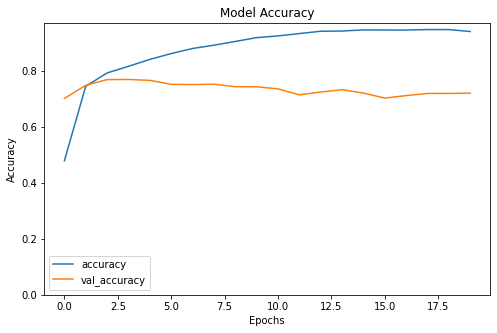

In [57]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0)
plt.show()

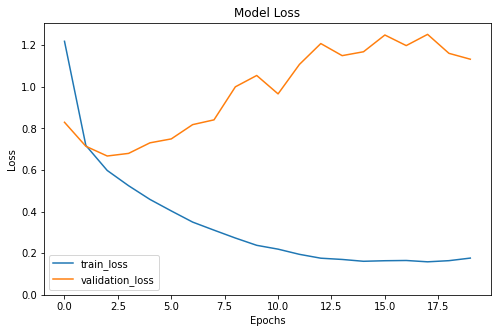

In [58]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()